#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Let's take a look at a sample of the images in the dataset:

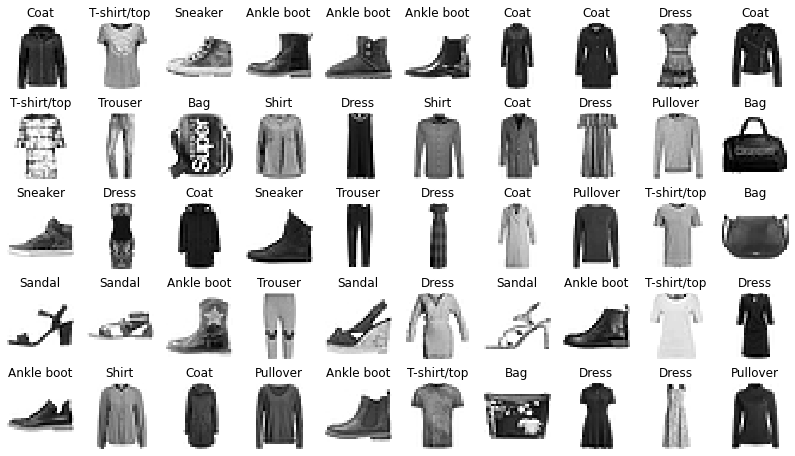

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std
X_test  = (X_test - mean) / std


#Add one dimension to manage the channel
X_train = tf.expand_dims(X_train, 3) 
X_valid = tf.expand_dims(X_valid, 3) 
X_test  = tf.expand_dims(X_test , 3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 24s 56ms/step - loss: 1.0199 - accuracy: 0.6841 - val_loss: 0.4988 - val_accuracy: 0.8288
Epoch 2/10
430/430 [==============================] - 23s 54ms/step - loss: 0.4855 - accuracy: 0.8321 - val_loss: 0.4286 - val_accuracy: 0.8596
Epoch 3/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4272 - accuracy: 0.8538 - val_loss: 0.4034 - val_accuracy: 0.8632
Epoch 4/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4006 - accuracy: 0.8611 - val_loss: 0.3882 - val_accuracy: 0.8684
Epoch 5/10
430/430 [==============================] - 23s 54ms/step - loss: 0.3774 - accuracy: 0.8696 - val_loss: 0.3720 - val_accuracy: 0.8734
Epoch 6/10
430/430 [==============================] - 23s 53ms/step - loss: 0.3610 - accuracy: 0.8749 - val_loss: 0.3594 - val_accuracy: 0.8768
Epoch 7/10
430/430 [==============================] - 23s 53ms/step - loss: 0.3509 - accuracy: 0.8771 - val_loss: 0.3584 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 0.3639 - accuracy: 0.8730
accuracy: 87.30%


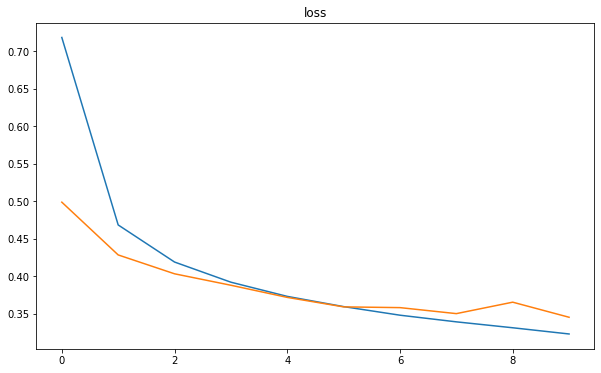

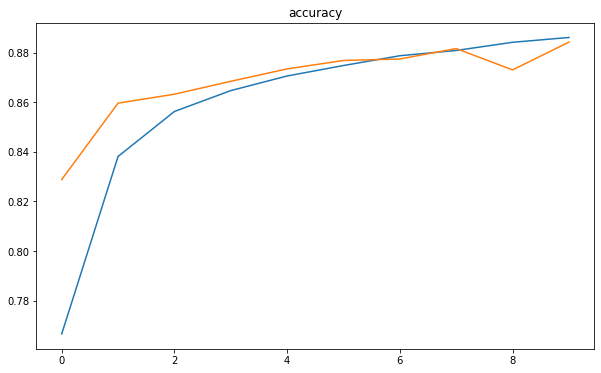

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

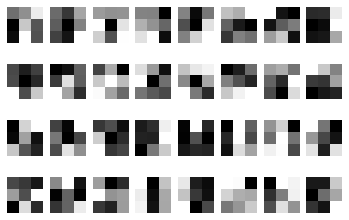

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   For the first Conv2D layer, the number of parameters is computed as (((width_filter * height_filter * n_channels_input_image)+1) * number_of_filters), hence we obtain (((3 * 3 * 1)+1) * 32) = 320. Regarding the second Conv2D layer, the formula is similar, but we substitute the multiplication by the number of channels of the input image with a multiplication by the number of feature maps of the previous layer; therefore we can computer the number of parameters as (((width_filter * height_filter * n_feature_maps_prev_layer)+1) * number_of_filters). Substituting with the actual values we obtain (((2 * 2 * 32)+1) * 16) = 2064.
2.   The main reason for which the two considered convolutional layers have a different number of parameters is that the first convolutional layer — while having 32 different kernels with respect to the 16 kernels of the second convolutional layer — applied its filters on an input image of only 1 channel, whether the second convolutional layer applied its filters on the output of the first Max Pooling layer, which had 32 feature maps due to the filtering of the first layer. Therefore, the filtering of all the 16 kernel of the second convolutional layer is applied on all the 32 feature maps of its input, thus obtaining a higher number of parameters.

Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 27s 61ms/step - loss: 1.4791 - accuracy: 0.4945 - val_loss: 0.6934 - val_accuracy: 0.7492
Epoch 2/10
430/430 [==============================] - 26s 61ms/step - loss: 0.6747 - accuracy: 0.7614 - val_loss: 0.5752 - val_accuracy: 0.8048
Epoch 3/10
430/430 [==============================] - 26s 61ms/step - loss: 0.5660 - accuracy: 0.7994 - val_loss: 0.5068 - val_accuracy: 0.8350
Epoch 4/10
430/430 [==============================] - 26s 61ms/step - loss: 0.5055 - accuracy: 0.8196 - val_loss: 0.4987 - val_accuracy: 0.8270
Epoch 5/10
430/430 [==============================] - 26s 61ms/step - loss: 0.4759 - accuracy: 0.8308 - val_loss: 0.4802 - val_accuracy: 0.8214
Epoch 6/10
430/430 [==============================] - 26s 61ms/step - loss: 0.4533 - accuracy: 0.8411 - val_loss: 0.4303 - val_accuracy: 0.8538
Epoch 7/10
430/430 [==============================] - 26s 61ms/step - loss: 0.4361 - accuracy: 0.8460 - val_loss: 0.4256 - val_accuracy:

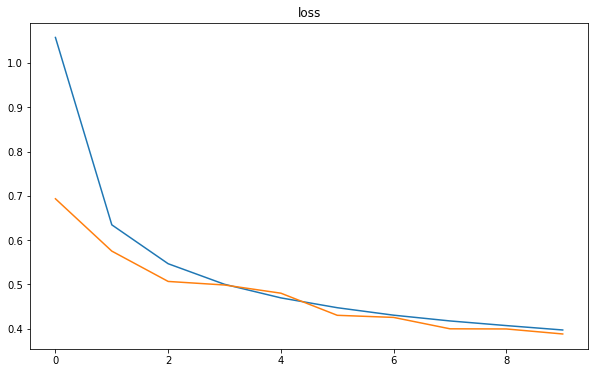

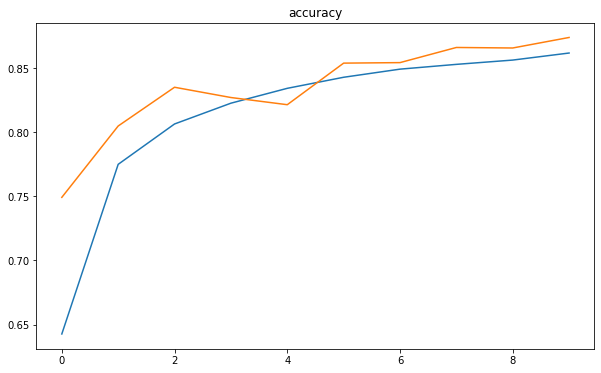

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Epoch 1/20
860/860 [==============================] - 29s 33ms/step - loss: 0.7764 - accuracy: 0.7265 - val_loss: 0.4099 - val_accuracy: 0.8586
Epoch 2/20
860/860 [==============================] - 28s 32ms/step - loss: 0.3723 - accuracy: 0.8664 - val_loss: 0.3492 - val_accuracy: 0.8776
Epoch 3/20
860/860 [==============================] - 27s 32ms/step - loss: 0.3439 - accuracy: 0.8789 - val_loss: 0.3281 - val_accuracy: 0.8910
Epoch 4/20
860/860 [==============================] - 28s 33ms/step - loss: 0.3062 - accuracy: 0.8914 - val_loss: 0.3088 - val_accuracy: 0.8912
Epoch 5/20
860/860 [==============================] - 27s 32ms/step - loss: 0.2954 - accuracy: 0.8957 - val_loss: 0.3072 - val_accuracy: 0.8932
Epoch 6/20
860/860 [==============================] - 27s 32ms/step - loss: 0.2801 - accuracy: 0.8996 - val_loss: 0.3011 - val_accuracy: 0.8948
Epoch 7/20
860/860 [==============================] - 27s 32ms/step - loss: 0.2745 - accuracy: 0.9027 - val_loss: 0.2860 - val_accuracy:

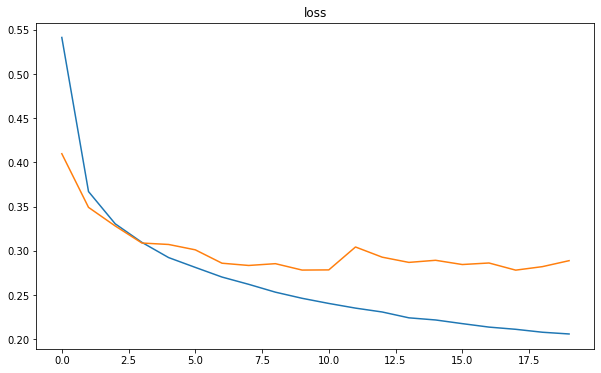

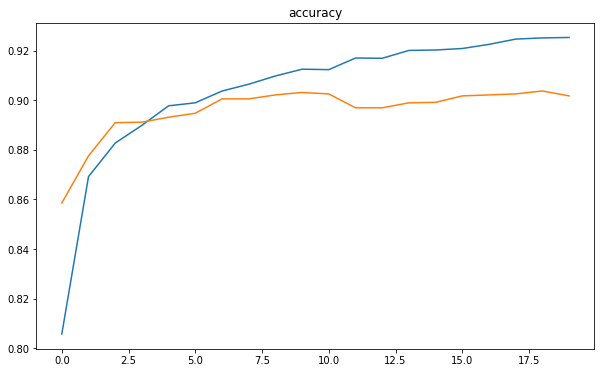

In [16]:
# 1° MODEL - ADD ONE CONVOLUTION LAYER (FOLLOWED BY A NEW MAXPOOLING LAYER)
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found is by using Adam optimizer instead of SGD and by training with 20 epochs and with 64 batch size. 

For this model, I obtained the following performances:

LOSS: 0.2999 - ACCURACY: 0.9007

Discussion:
This model was bound to be the best among the others from the start, since we introduced an improved version (i.e. Adam) of the regular optimizer (i.e. SGD). Adam exploits the benefits of both AdaGrad and RMSProp — that are other improved versions of SGD based on the concept of adaptive learning rate — and uses a momentum factor incorporated as an estimate of first and second order moments of the gradient. The performance on the test set was also enhanced by a longer training phase (20 epochs instead of 10) a by a reduction of the batch size (64 instead of 128); taken singularly, these settings provide an increase in performance for the original model, so I thought that adopting all these hyperparameters choices would led me to the best model.

Besides, I tested also other models that applied the following changes (with respect to the original model): 
* ***1st MODEL***

  Added a 2D convolutional layer with kernel size 3x3 and 32 output filters/features (that uses ReLu activation function) after the second Max Pooling layer of the starting model. 
  
  LOSS: 0.4341 - ACCURACY: 0.8451
* ***2nd MODEL***

  Used sigmoid activation function instead of ReLu for each 2D convolutional layer. 
  
  LOSS: 0.7021 - ACCURACY: 0.7413
* ***3rd MODEL***

  Trained with 20 epochs instead of 10. 
  
  LOSS: 0.3676 - ACCURACY: 0.8712 
* ***4th MODEL***

  Increased the batch size from 128 to 256. 
  
  LOSS: 0.4583 - ACCURACY: 0.8386
* ***5th MODEL***

  Decreased the batch size from 128 to 64. 
  
  LOSS: 0.3603 - ACCURACY: 0.8753
* ***6th MODEL***
  
  Changed the *pool_size* of both the Max Pooling layers from 2x2 to 4x4. 
  
  LOSS: 0.7524 - ACCURACY: 0.7327
* ***7th MODEL***
  
  Used Adam optimizer instead of SGD (with 10 epochs). 
  
  LOSS: 0.3129 - ACCURACY: 0.8905
* ***8th MODEL***
  
  Used Adam optimizer instead of SGD (with 20 epochs). 
  
  LOSS: 0.3060 - ACCURACY: 0.8937



Discussion: Besides the model that uses Adam as optimizer, another good model was obtained by simply doubling the number of epochs of training, thus obtaining an increase of performance on the test set by reaching 87.12% of accuracy. Also, a good model is obtained by decreasing the batch size from 128 to 64; with this change, we obtain an accuracy of 87.53%. 
The two worst models where obtained by using the sigmoid activation function (that is why in general we usually prefer to use the ReLu activation function) with 74.13% accuracy, and by doubling the size of the Max Pooling masks (with max pooling masks of this size, the model probably "summarizes" too much the output of the previous layers, thus the overall performance drops by more than 10%) with 73.27% accuracy. The other models tested above didn't provide any significant improvement or drop in performances.
